## Import Library

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
!pip -q install CausalImpact
from causalimpact import CausalImpact

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.8 MB/s eta 0:00:00


In [ ]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from pandas import Series
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = 12, 8

## Upload and Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Closed施策効果検証_nonPII.xlsx to Closed施策効果検証_nonPII.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pur_data_Feb.csv to Pur_data_Feb.csv


In [ ]:
d = pd.read_csv('Pur_data_Feb.csv')
d = d[['ACTIVATION_DATE','SI_NUMBER','ENTRY_CODE','TERMINATED_DATE','SHORT_CHURN','MALICE_FLG','FLG_1_7', 'FLG_1_30', 'FLG_3_30', 'FLG_3_90', 'FLG_9', 'FLG_20', 'FLG_50', 'FLG_60', 'FLG_150', 'FLG_24HUL', 'FLG_7DUL']].set_index('ACTIVATION_DATE').sort_values(by='ACTIVATION_DATE')

,SI_NUMBER,ENTRY_CODE,TERMINATED_DATE,SHORT_CHURN,MALICE_FLG,FLG_1_7,FLG_1_30,FLG_3_30,FLG_3_90,FLG_9,FLG_20,FLG_50,FLG_60,FLG_150,FLG_24HUL,FLG_7DUL
ACTIVATION_DATE,,,,,,,,,,,,,,,,
2023-02-01,LW103774276,NaN,2023-02-03,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771281,05_Google,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771186,01_referral,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771450,01_referral,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103747681,01_referral,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,LW103804889,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-02-20,LW103803960,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-20,LW103802552,01_referral,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d['FLG_1_7_yen'] = d['FLG_1_7'].apply(lambda x : 355 if x >0 else 0)
d['FLG_1_30_yen'] = d['FLG_1_30'].apply(lambda x : 454 if x >0 else 0)
d['FLG_3_30_yen'] = d['FLG_3_30'].apply(lambda x : 900 if x >0 else 0)
d['FLG_3_90_yen'] = d['FLG_3_90'].apply(lambda x : 1164 if x >0 else 0)
d['FLG_9_yen'] = d['FLG_9'].apply(lambda x : 2536 if x >0 else 0)
d['FLG_20_yen'] = d['FLG_20'].apply(lambda x : 2455 if x >0 else 0)
d['FLG_50_yen'] = d['FLG_50'].apply(lambda x : 4500 if x >0 else 0)
d['FLG_60_yen'] = d['FLG_60'].apply(lambda x : 5900 if x >0 else 0)
d['FLG_150_yen'] = d['FLG_150'].apply(lambda x : 11800 if x >0 else 0)
d['FLG_24HUL_yen'] = d['FLG_24HUL'].apply(lambda x : 300 if x >0 else 0)
d['FLG_7DUL_yen'] = d['FLG_7DUL'].apply(lambda x : 1636 if x >0 else 0)

In [ ]:
d['FLG_1_7_DARPU'] = d['FLG_1_7'].apply(lambda x : 355 if x >0 else 0)
d['FLG_1_30_DARPU'] = d['FLG_1_30'].apply(lambda x : 454 if x >0 else 0)
d['FLG_3_30_DARPU'] = d['FLG_3_30'].apply(lambda x : 900 if x >0 else 0)
d['FLG_3_90_DARPU'] = d['FLG_3_90'].apply(lambda x : 388 if x >0 else 0)
d['FLG_9_DARPU'] = d['FLG_9'].apply(lambda x : 845 if x >0 else 0)
d['FLG_20_DARPU'] = d['FLG_20'].apply(lambda x : 2455 if x >0 else 0)
d['FLG_50_DARPU'] = d['FLG_50'].apply(lambda x : 4500 if x >0 else 0)
d['FLG_60_DARPU'] = d['FLG_60'].apply(lambda x : 1967 if x >0 else 0)
d['FLG_150_DARPU'] = d['FLG_150'].apply(lambda x : 1967 if x >0 else 0)
d['FLG_24HUL_DARPU'] = d['FLG_24HUL'].apply(lambda x : 300 if x >0 else 0)
d['FLG_7DUL_DARPU'] = d['FLG_7DUL'].apply(lambda x : 1636 if x >0 else 0)

In [ ]:
d['加入翌日まで売上'] = d['FLG_1_7_yen'] + d['FLG_1_30_yen'] + d['FLG_3_30_yen'] + d['FLG_3_90_yen'] + d['FLG_9_yen'] + d['FLG_20_yen'] + d['FLG_50_yen'] + d['FLG_60_yen'] + d['FLG_150_yen'] + d['FLG_24HUL_yen'] + d['FLG_7DUL_yen']
d['DARPU'] = d['FLG_1_7_DARPU'] + d['FLG_1_30_DARPU'] + d['FLG_3_30_DARPU'] + d['FLG_3_90_DARPU'] + d['FLG_9_DARPU'] + d['FLG_20_DARPU'] + d['FLG_50_DARPU'] + d['FLG_60_DARPU'] + d['FLG_150_DARPU'] + d['FLG_24HUL_DARPU'] + d['FLG_7DUL_DARPU']
d = d[['SI_NUMBER', 'ENTRY_CODE', 'TERMINATED_DATE', 'SHORT_CHURN', 'MALICE_FLG','加入翌日まで売上', 'DARPU', 'FLG_1_7', 'FLG_1_30', 'FLG_3_30', 'FLG_3_90', 'FLG_9', 'FLG_20', 'FLG_50', 'FLG_60', 'FLG_150', 'FLG_24HUL', 'FLG_7DUL']]

,SI_NUMBER,ENTRY_CODE,TERMINATED_DATE,SHORT_CHURN,MALICE_FLG,加入翌日まで売上,DARPU,FLG_1_7,FLG_1_30,FLG_3_30,FLG_3_90,FLG_9,FLG_20,FLG_50,FLG_60,FLG_150,FLG_24HUL,FLG_7DUL
ACTIVATION_DATE,,,,,,,,,,,,,,,,,,
2023-02-01,LW103774276,NaN,2023-02-03,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771281,05_Google,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771186,01_referral,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103771450,01_referral,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,LW103747681,01_referral,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,LW103804889,NaN,NaN,0,0,2455,2455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-02-20,LW103803960,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-20,LW103802552,01_referral,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = pd.read_excel('Closed施策効果検証_nonPII.xlsx', sheet_name='202211', index_col=0)
df2['DARPU'] = df2['DARPU'].astype(int)

現時点で、DIDの仮定を満たしているとは思えないので、まずは探索的に満たせるレベルまで落とし込む

そのためには悪意者の排除、エントリーコード別にみてみるなどの方法が取れる

DIDの仮定

**・平行トレンド仮定**

**・共通ショック仮定**

共通ショック仮定に関してはエントリーコードの揃えである程度満たせそうか検証

平行トレンド仮定は調整後に示唆が得られるかどうかがキー

# 悪意者を抜いたデータセットの用意

In [ ]:
# Nov Data

df2_excl_mali = df2[df2['MALICE_FLG']!=1]

df2_nonpur = df2_excl_mali[df2_excl_mali['DARPU']==0]
df2_nonpur_sum = df2_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df2_pur_sum = df2_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df2_pur_sum = df2_pur_sum.merge(df2_nonpur_sum, on='ACTIVATION_DATE')
df2_pur_sum['pur_rate'] = 1 - (df2_pur_sum['Non_purchasers']/df2_pur_sum['GA'])
df2_pur_sum1 = df2_pur_sum.reset_index()
df2_pur_sum1 = df2_pur_sum1.reset_index()
df2_pur_sum_kore = df2_pur_sum1

In [ ]:
# Feb data

df1_excl_mali = d[d['MALICE_FLG']!=1]

df1_nonpur = df1_excl_mali[df1_excl_mali['DARPU']==0]
df1_nonpur_sum = df1_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df1_pur_sum = df1_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df1_pur_sum = df1_pur_sum.merge(df1_nonpur_sum, on='ACTIVATION_DATE')
df1_pur_sum['pur_rate'] = 1 - (df1_pur_sum['Non_purchasers']/df1_pur_sum['GA'])
df1_pur_sum1 = df1_pur_sum.reset_index()
df1_pur_sum1 = df1_pur_sum1.reset_index()
df1_pur_sum_kore = df1_pur_sum1

# ****データセットの準備 - 本番データ

In [ ]:
merege_df = df2_pur_sum_kore.merge(df1_pur_sum_kore, on=['index'], how='left')
merege_df = merege_df[['index','pur_rate_y','pur_rate_x']].rename(columns={'pur_rate_x':'pur_rate_Nov','pur_rate_y':'pur_rate_Feb'})
merege_df

,index,pur_rate_Feb,pur_rate_Nov
0,0,0.319890,0.271906
1,1,0.275819,0.275898
2,2,0.253968,0.296549
3,3,0.307159,0.253823
4,4,0.312291,0.245464
5,5,0.283902,0.328310
6,6,0.243223,0.275301
7,7,0.261923,0.286462
8,8,0.237586,0.249639
9,9,0.232129,0.273016


In [ ]:
print(merege_df['pur_rate_Nov'][0:15].mean())
print(merege_df['pur_rate_Nov'][16:20].mean())
print(merege_df['pur_rate_Feb'][0:15].mean())
print(merege_df['pur_rate_Feb'][16:20].mean())

0.26861462686716797
0.2619089513415758
0.2676603086009465
0.26175683428696433


購入率はデイリーで見ると確かに平行トレンドを満たしていないように思える

平均値に均した時に、購入率の平均値が90%以上一致しているので、平均にしたときにまずは似ていることで、ここで平行トレンド仮定をある程度満たしているとみなす

11月のこのデータを用いて2月後半の反実仮想的な予測値を出す

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merege_df['index'], y=merege_df['pur_rate_Nov'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=merege_df['index'], y=merege_df['pur_rate_Feb'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

# CausalImpact適用

In [ ]:
from datetime import datetime, timedelta, date, time
until = 15
merege_df = merege_df.set_index('index')

In [ ]:
merege_df = merege_df[0:20]
# 2月13日から2月28日までの日付を作成する
new_dates = pd.date_range(start='2023-02-21', end='2023-02-28', freq='D')
date_df = df1_pur_sum1[['ACTIVATION_DATE']]
date_df= date_df.rename(columns={'ACTIVATION_DATE':'Date'})
date_df = date_df.append(pd.DataFrame({'Date': new_dates}), ignore_index=True)
merege_df['Date'] = date_df['Date']
merege_df

,pur_rate_Feb,pur_rate_Nov,Date
index,,,
0,0.319890,0.271906,2023-02-01
1,0.275819,0.275898,2023-02-02
2,0.253968,0.296549,2023-02-03
3,0.307159,0.253823,2023-02-04
4,0.312291,0.245464,2023-02-05
5,0.283902,0.328310,2023-02-06
6,0.243223,0.275301,2023-02-07
7,0.261923,0.286462,2023-02-08
8,0.237586,0.249639,2023-02-09


In [ ]:
merege_df = merege_df.set_index('Date')

In [ ]:
pre_period = ['2023-02-01', '2023-02-16']
post_period = ['2023-02-17', '2023-02-20'] #ここを最新に変えないといけない

In [ ]:
merege_df = merege_df*100

In [ ]:
ci = CausalImpact(merege_df, pre_period, post_period)
ci.run()

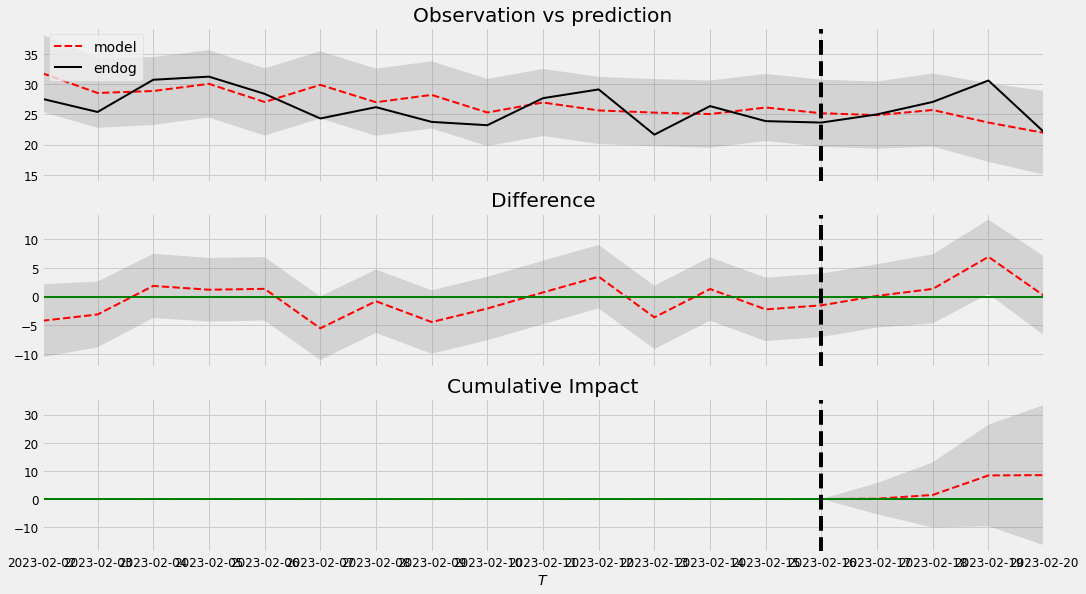

In [ ]:
ci.plot(figsize=(16, 9))

In [ ]:
print(ci.summary())

                                Average       Cumulative
Actual                               26              104
Predicted                            24               96
95% CI                         [17, 30]        [71, 121]
                                                        
Absolute Effect                       2                8
95% CI                          [8, -4]        [33, -16]
                                                        
Relative Effect                    8.8%             8.8%
95% CI                  [34.8%, -17.1%]  [34.8%, -17.1%]
                                                        
P-value                            0.0%                 
Prob. of Causal Effect           100.0%                 
None


In [ ]:
print(ci.summary(output='report'))

During the post-intervention period, the response             variable had an average value of             approx. 26.
By contrast, in  the absence of an intervention, we would have expected an average response of 24. The 95% interval of
this counterfactual prediction is [17, 30]. Subtracting this prediction from the observed response yields an estimate of
the causal effect the intervention had on the response variable. This effect is 2 with a 95% interval of [8, -4]. For a
discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 104.  By contrast, had  the intervention not taken place, we
would have expected a sum of 96. The 95% interval of this prediction is [71, 121]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  8.8%. The 95% i

In [ ]:
#効果検証の時に着目するところはAbsolute Effectの左と右、両方数字
#Averageは日々の効果の影響度合い、ここでは100掛けでみているので、実際は100割った数字が増加分%
#Relative Effectは増減の影響度合いを示す